In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Criando uma série temporal

Nós temos uma séries temporal com uma curva sinótica. Removemos o nono elemento do sinal, como se de alguma forma não tivéssemos recebido esse sinal.

In [2]:
# create array
num_of_records = 20

x = pd.Series(np.linspace(0, 2 * np.pi, num_of_records))
y = pd.Series(20 * np.sin(x))

In [3]:
# choose item to be removed
i = 8

# keep original values
y_original = y[i]

# remove values from our data
y[i] = np.nan

Text(0.5, 1.0, 'Sinal original com um dado ausente')

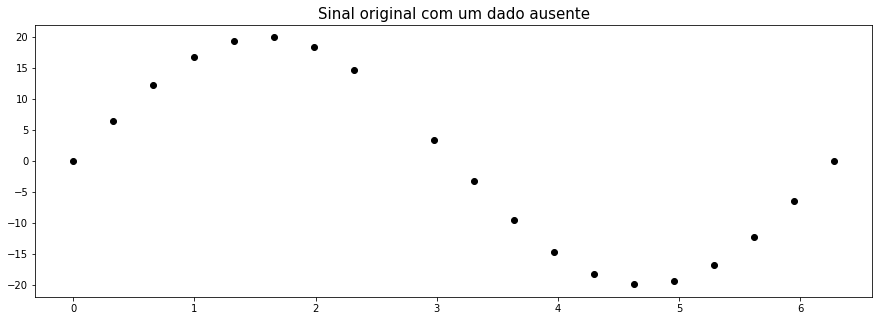

In [4]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.title('Sinal original com um dado ausente', fontsize=15)

Text(0.5, 1.0, 'Sinal original enviado')

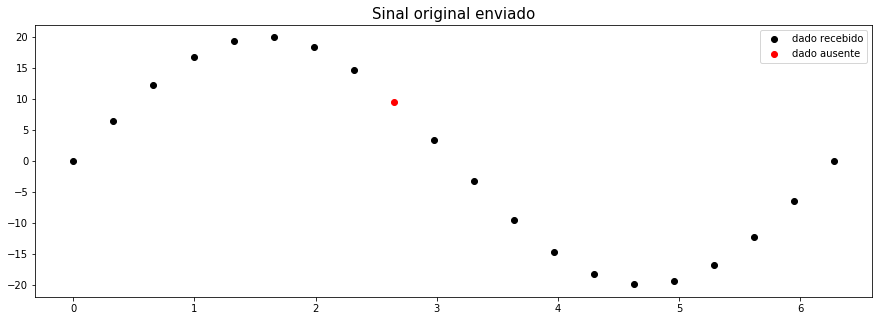

In [5]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.legend(['dado recebido', 'dado ausente'])
plt.title('Sinal original enviado', fontsize=15)

# Lidando com as ausências de maneira linear

If our signal is typical linear signal (or close to it) we can simply get the mean of the value before and the value after. Since our curve is not linear, we have a small difference, but still close enough to make this predicted value very good for us.

In [6]:
yi_calculated = np.mean([y[i-1], y[i+1]])

print(y_original - yi_calculated)

0.5157628512028154


Text(0.5, 1.0, 'Sinal temporal - Interpolação linear')

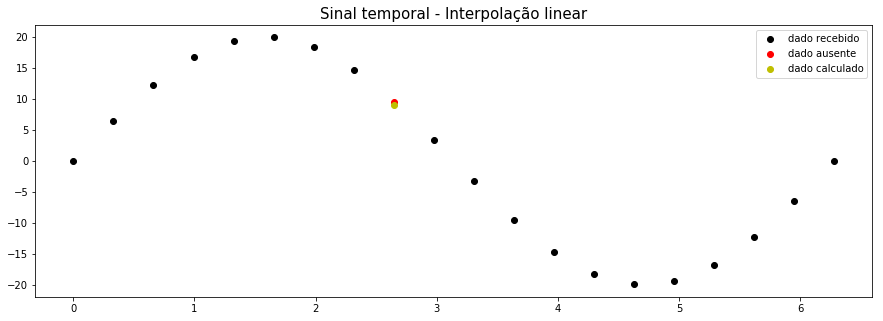

In [7]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.plot(x[i], yi_calculated, 'oy')

plt.legend(['dado recebido', 'dado ausente', 'dado calculado'])
plt.title('Sinal temporal - Interpolação linear', fontsize=15)

Obviously we have a more optimized way of doing this. 

In [8]:
yi = pd.Series(y)
yi = yi.interpolate()
print(y_original - yi[i])

0.5157628512028154


# Lidando com ausência de dados usando a média


If we think that our data doesn't fit in a linear pattern, we could use a strategy that will not modify our main statistics, such as replacing it by its average

In [9]:
yi_calculated = y.mean()

print(y_original - yi_calculated)

10.019945116569971


Text(0.5, 1.0, 'Sinal temporal -  Preenchando com a média')

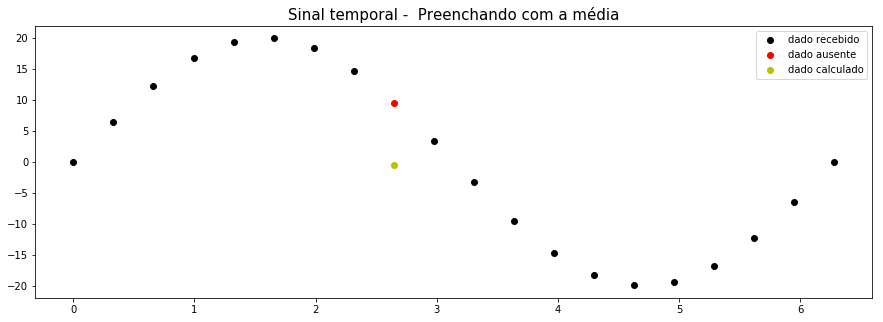

In [10]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.plot(x[i], yi_calculated, 'oy')

plt.legend(['dado recebido', 'dado ausente', 'dado calculado'])
plt.title('Sinal temporal -  Preenchando com a média', fontsize=15)

Of course, for this data this doesn't seem to make any sense. However, what if your data presented no real pattern to be seen?

In [11]:
noise = pd.Series([ 0.11604849,  0.9568581 , -0.83154595,  0.87675812,  0.55517057,
                    0.38539126, -0.78490851,  1.52722683, -1.53470131,  0.10656216,
                   -0.09696747, -0.95508694, -0.46314156,  1.07489003,  0.11527739,
                    0.66840295, -1.38479986, -1.70442386, -0.74144102,  0.67423001])

Text(0.5, 1.0, 'Sinal temporal aleatório enviado')

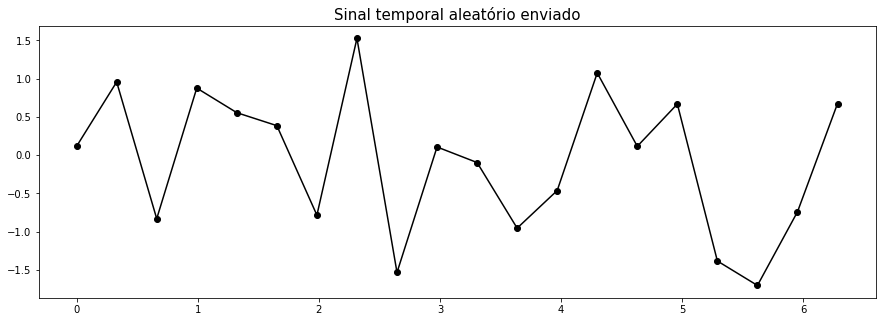

In [12]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x, noise, '-k')

plt.title('Sinal temporal aleatório enviado', fontsize=15)

In [13]:
i = 14
noise_original = noise[i]
noise[i] = np.nan

Text(0.5, 1.0, 'Sinal temporal aleatório recebido')

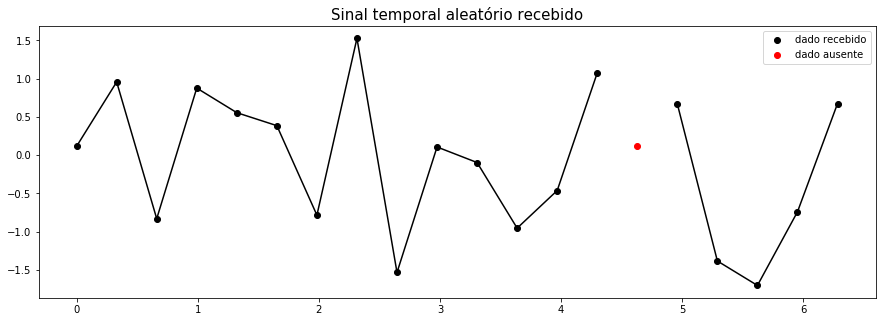

In [14]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x, noise, '-k')

plt.legend(['dado recebido', 'dado ausente'])
plt.title('Sinal temporal aleatório recebido', fontsize=15)

In [15]:
noise_interpolate = noise.interpolate()

Text(0.5, 1.0, 'Sinal temporal aleatório - Preenchimento com interpolação linear')

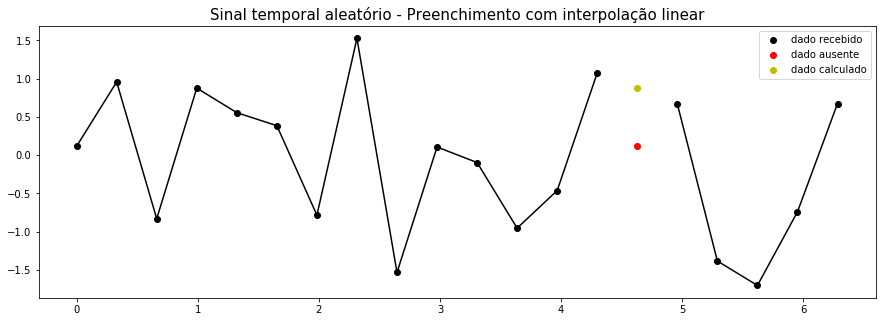

In [16]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_interpolate[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['dado recebido', 'dado ausente', 'dado calculado'])
plt.title('Sinal temporal aleatório - Preenchimento com interpolação linear', fontsize=15)

So, this doesn't sound good...

One possible strategy is to replace all missing values by the mean value of the series. Unfortunately, this strategy can severely distort the distribution for this variable, leading to complications with summary measures including, notably, underestimates of the standard deviation.

In [17]:
print('Mean before interp:', noise.mean())
print('Mean after interp:', noise.interpolate().mean())

Mean before interp: -0.08186726105263156
Mean after interp: -0.034191573500000016


In [18]:
comparison = pd.DataFrame({'original': noise, 'interpolated': noise_interpolate})
comparison.describe()

,original,interpolated
count,19.000000,20.000000
mean,-0.081867,-0.034192
std,0.960297,0.958695
min,-1.704424,-1.704424
25%,-0.808227,-0.796568
50%,0.106562,0.111305
75%,0.671316,0.723584
max,1.527227,1.527227


Thus, we can use the mean value of the series as an approximation, to fill our data and keep our mean just the same! On our example, the values were a pretty good approximation, but things could not be as good.

In [19]:
noise_fillna = noise.fillna(noise.mean())

Text(0.5, 1.0, 'Sinal temporal aleatório - Preenchimento com média')

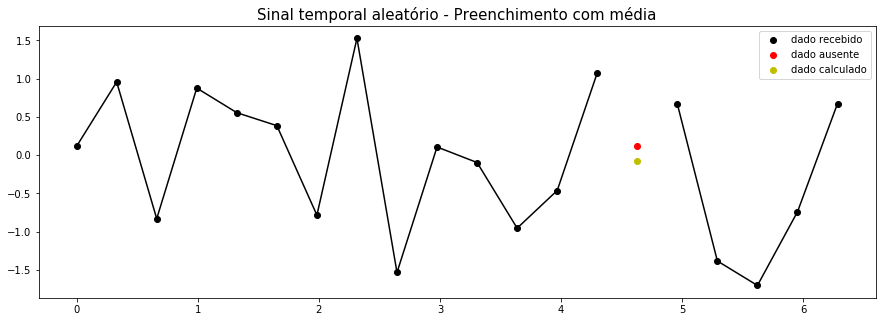

In [20]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_fillna[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['dado recebido', 'dado ausente', 'dado calculado'])
plt.title('Sinal temporal aleatório - Preenchimento com média', fontsize=15)

In [21]:
comparison = pd.DataFrame({'original': noise, 'filled': noise_fillna})
comparison.describe()

,original,filled
count,19.000000,20.000000
mean,-0.081867,-0.081867
std,0.960297,0.934685
min,-1.704424,-1.704424
25%,-0.808227,-0.796568
50%,0.106562,0.012347
75%,0.671316,0.669860
max,1.527227,1.527227


# Lidando com dados ausentes usando dados existentes

In [22]:
noise_ffill = noise.fillna(method='ffill')

Text(0.5, 1.0, 'Sinal temporal aleatório - Preenchimento com valor anterior')

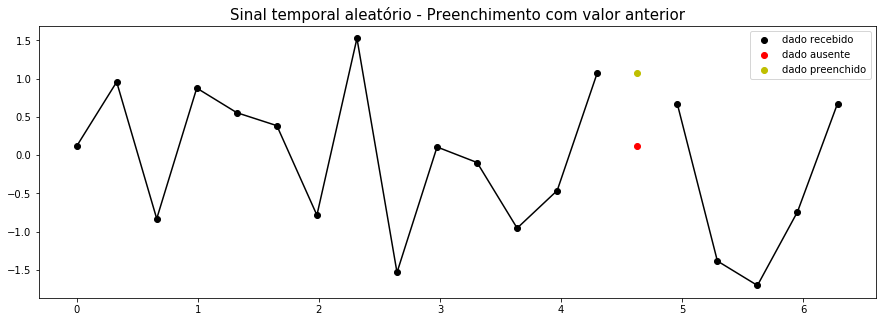

In [23]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_ffill[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['dado recebido', 'dado ausente', 'dado preenchido'])
plt.title('Sinal temporal aleatório - Preenchimento com valor anterior', fontsize=15)

In [24]:
noise_bfill = noise.fillna(method='bfill')

Text(0.5, 1.0, 'Sinal temporal aleatório - Preenchimento com o próximo ponto')

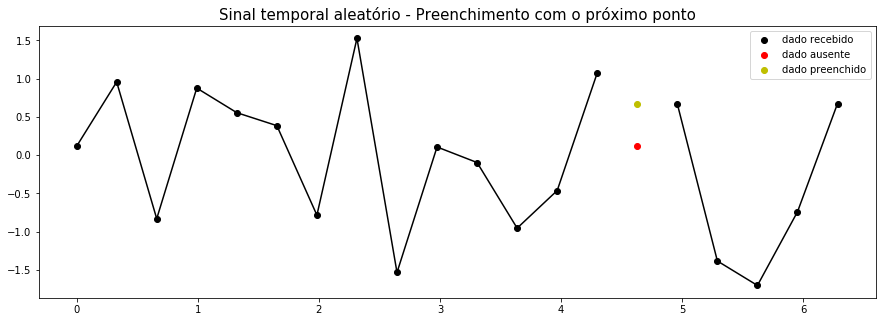

In [25]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_bfill[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['dado recebido', 'dado ausente', 'dado preenchido'])
plt.title('Sinal temporal aleatório - Preenchimento com o próximo ponto', fontsize=15)

# Comparação estatística entre métodos

In [26]:
comparison = pd.DataFrame({
    'original': noise, 
    'interpolacao_linear': noise_interpolate,
    'preenchimento_com_media': noise_fillna,
    'preenchimento_com_proximo_dado': noise_bfill,
    'preenchimento_com_dado_anterior': noise_ffill
})
comparison.describe()

,original,interpolacao_linear,preenchimento_com_media,preenchimento_com_proximo_dado,preenchimento_com_dado_anterior
count,19.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.081867,-0.034192,-0.081867,-0.044354,-0.024029
std,0.960297,0.958695,0.934685,0.949622,0.969815
min,-1.704424,-1.704424,-1.704424,-1.704424,-1.704424
25%,-0.808227,-0.796568,-0.796568,-0.796568,-0.796568
50%,0.106562,0.111305,0.012347,0.111305,0.111305
75%,0.671316,0.723584,0.669860,0.669860,0.724862
max,1.527227,1.527227,1.527227,1.527227,1.527227


In [27]:
comparison = pd.DataFrame({
    'original': noise, 
    'interpolacao_linear': noise_interpolate,
    'preeenchimento_com_media': noise_fillna,
})
comparison.describe()

,original,interpolacao_linear,preeenchimento_com_media
count,19.000000,20.000000,20.000000
mean,-0.081867,-0.034192,-0.081867
std,0.960297,0.958695,0.934685
min,-1.704424,-1.704424,-1.704424
25%,-0.808227,-0.796568,-0.796568
50%,0.106562,0.111305,0.012347
75%,0.671316,0.723584,0.669860
max,1.527227,1.527227,1.527227


www.stat.columbia.edu/~gelman/arm/missing.pdf